In [ ]:
#Cell 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cell 2
import os
# TODO: Enter the relative path in your Google Drive to the unzipped folder for hw1_code_submission.zip
FOLDERNAME = 'PS1_code' # e.g. 'cs7643/hw1/Code'

assert FOLDERNAME is not None, "[!] Enter the foldername."
working_directory = os.path.join("/content/drive/MyDrive/", FOLDERNAME)
assert os.path.exists(working_directory), "Make sure your FOLDERNAME is correct"
%cd $working_directory/data
!sh get_data.sh
%cd ..

/content/drive/MyDrive/PS1_code/data
--2025-02-01 20:06:07--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv.4’

mnist_train.csv.4   100%[===================>] 104.50M  18.5MB/s    in 6.0s    

2025-02-01 20:06:14 (17.6 MB/s) - ‘mnist_train.csv.4’ saved [109575994/109575994]

--2025-02-01 20:06:14--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/csv]
Saving to: ‘mnist_test.csv.4’

mnist_test.csv.4    100%[===================>]  17.44M  16.0MB/s    in 1.1s    

2025-02-01 20:06:15 (16.0 MB/s) - ‘mnist_test.csv.4’ saved [18289443/18289443]

/content

In [ ]:
# Cell 3
# Run all local tests in this block
# If you get an error saying test not found, add an __init__.py file in the
# tests directory
!python -m unittest tests.test_activation
!python -m unittest tests.test_loss
!python -m unittest tests.test_training

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK
..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK
Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
...Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
.
----------------------------------------------------------------------
Ran 4 tests in 51.641s

OK


In [ ]:
#Cell 4
import yaml
import copy

from models import TwoLayerNet, SoftmaxRegression
from optimizer import SGD
from utils import load_mnist_trainval, load_mnist_test, generate_batched_data, train, evaluate, plot_curves

In [ ]:
# Cell 5
%matplotlib inline
def train_model(yaml_config_file):
  args = {}
  with open(yaml_config_file) as f:
      config = yaml.full_load(f)

  for key in config:
      for k, v in config[key].items():
          args[k] = v

  # Prepare MNIST data
  train_data, train_label, val_data, val_label = load_mnist_trainval()
  test_data, test_label = load_mnist_test()

  # Prepare model and optimizer
  if args["type"] == 'SoftmaxRegression':
      model = SoftmaxRegression()
  elif args["type"] == 'TwoLayerNet':
      model = TwoLayerNet(hidden_size=args["hidden_size"])
  optimizer = SGD(learning_rate=args["learning_rate"], reg=args["reg"])

  # Training Code
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  best_acc = 0.0
  best_model = None
  for epoch in range(args["epochs"]):
      batched_train_data, batched_train_label = generate_batched_data(train_data, train_label, batch_size=args["batch_size"], shuffle=True)
      epoch_loss, epoch_acc = train(epoch, batched_train_data, batched_train_label, model, optimizer, args["debug"])

      train_loss_history.append(epoch_loss)
      train_acc_history.append(epoch_acc)
      # evaluate on test data
      batched_test_data, batched_test_label = generate_batched_data(val_data, val_label, batch_size=args["batch_size"])
      valid_loss, valid_acc = evaluate(batched_test_data, batched_test_label, model, args["debug"])
      if args["debug"]:
          print("* Validation Accuracy: {accuracy:.4f}".format(accuracy=valid_acc))

      valid_loss_history.append(valid_loss)
      valid_acc_history.append(valid_acc)

      if valid_acc > best_acc:
          best_acc = valid_acc
          best_model = copy.deepcopy(model)

  #Testing Code
  batched_test_data, batched_test_label = generate_batched_data(test_data, test_label, batch_size=args["batch_size"])
  _, test_acc = evaluate(batched_test_data, batched_test_label, best_model) # test the best model
  if args["debug"]:
      print("Final Accuracy on Test Data: {accuracy:.4f}".format(accuracy=test_acc))

  return train_loss_history, train_acc_history, valid_loss_history, valid_acc_history

In [ ]:
# Cell 6
# train softmax model
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_softmax.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.012 	Batch Loss 2.3015	Train Accuracy 0.1250	
Epoch: [0][10/750]	Batch Time 0.000 	Batch Loss 1.7310	Train Accuracy 0.5469	
Epoch: [0][20/750]	Batch Time 0.001 	Batch Loss 1.3465	Train Accuracy 0.7188	
Epoch: [0][30/750]	Batch Time 0.001 	Batch Loss 0.9779	Train Accuracy 0.9062	
Epoch: [0][40/750]	Batch Time 0.001 	Batch Loss 0.9506	Train Accuracy 0.7969	
Epoch: [0][50/750]	Batch Time 0.000 	Batch Loss 0.7135	Train Accuracy 0.9062	
Epoch: [0][60/750]	Batch Time 0.000 	Batch Loss 0.9308	Train Accuracy 0.7500	
Epoch: [0][70/750]	Batch Time 0.001 	Batch Loss 0.6834	Train Accuracy 0.8750	
Epoch: [0][80/750]	Batch Time 0.001 	Batch Loss 0.7824	Train Accuracy 0.7500	
Epoch: [0][90/750]	Batch Time 0.000 	Batch Loss 0.6758	Train Accuracy 0.8594	
Epoch: [0][100/750]	Batch Time 0.000 	Batch Loss 0.6302	Train Accuracy 0.8281	
Epoch: [0][110/7

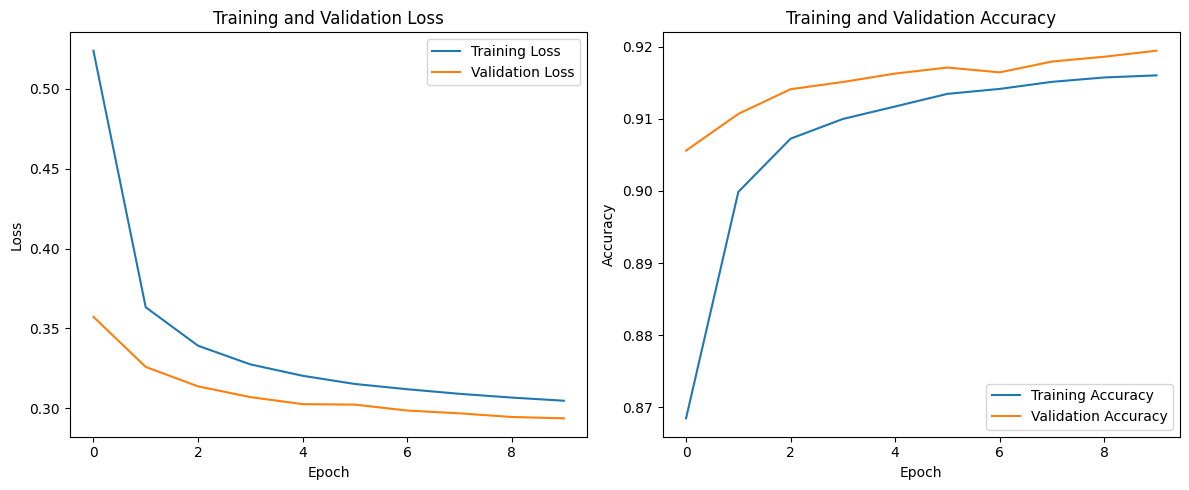

In [ ]:
# Cell 7
# plot results for softmax model
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 8
# train two layer neural network
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_twolayer.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3022	Train Accuracy 0.1406	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.3004	Train Accuracy 0.1250	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3126	Train Accuracy 0.1406	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3320	Train Accuracy 0.0469	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.3656	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.3418	Train Accuracy 0.0938	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3344	Train Accuracy 0.1094	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3091	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3046	Train Accuracy 0.1250	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3029	Train Accuracy 0.1406	
Epoch: [0][100/750]	Batch Time 0.005 	Batch Loss 2.3145	Train Accuracy 0.1094	
Epoch: [0][110/7

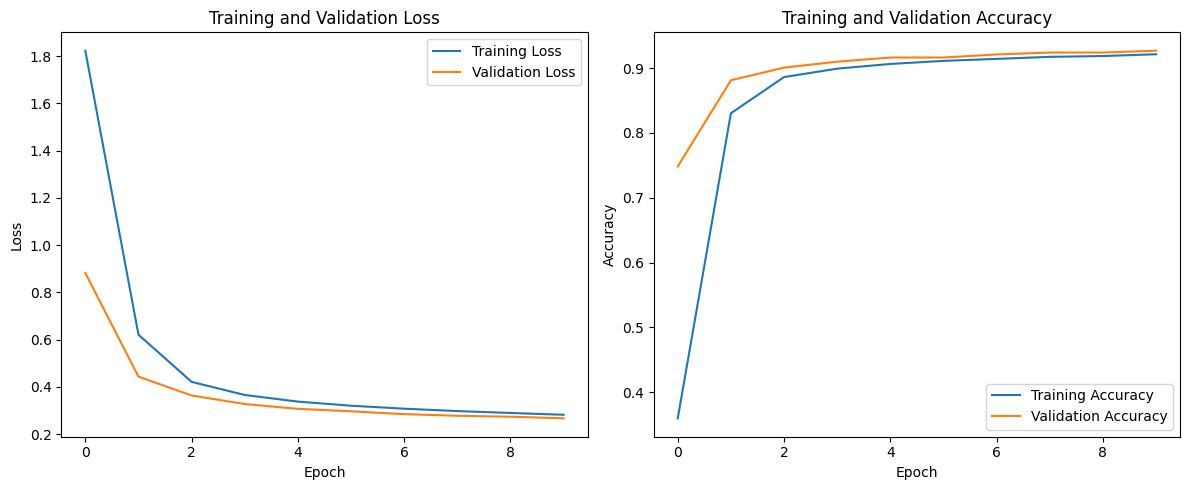

In [ ]:
# Cell 9
# plot two layer neural network
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

# **Assignment 1 Writeup**

- Name: Tianyi Zhu
- GT Email: zhu.tianyi@gatech.edu
- GT ID: tzhu311



## Two Layer Neural Network

# Learning Rates

- Tune the Two Layer Neural Network with various learning rates (while keeping all other hyperparameters constant) by changing the config file.
  - lr = 1
  - lr = 1e-1
  - lr = 1e-2
  - lr = 5e-2


In [ ]:
# Cell 10
# Change lr to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.010 	Batch Loss 2.3025	Train Accuracy 0.1406	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.2872	Train Accuracy 0.1094	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3617	Train Accuracy 0.0781	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.2515	Train Accuracy 0.1562	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.1493	Train Accuracy 0.2344	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.0797	Train Accuracy 0.2812	
Epoch: [0][60/750]	Batch Time 0.005 	Batch Loss 2.0467	Train Accuracy 0.2500	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.0838	Train Accuracy 0.2969	
Epoch: [0][80/750]	Batch Time 0.008 	Batch Loss 1.8698	Train Accuracy 0.3750	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 1.6583	Train Accuracy 0.4688	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 1.6026	Train Accuracy 0.4219	
Epoch: [0][110/7

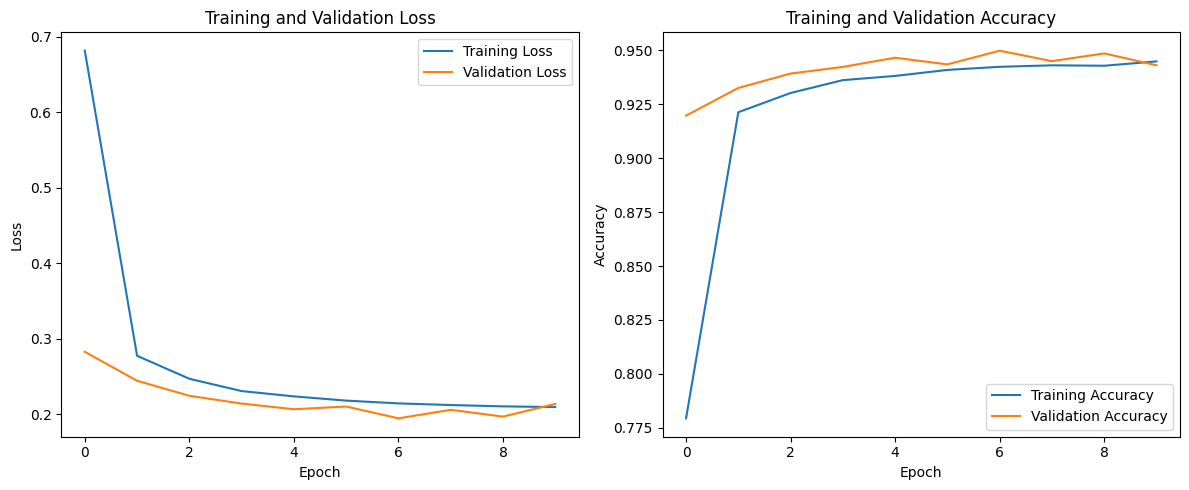

In [ ]:
# Cell 11
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 12
# Change lr to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3033	Train Accuracy 0.1094	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.2836	Train Accuracy 0.1562	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3115	Train Accuracy 0.1406	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3190	Train Accuracy 0.0938	
Epoch: [0][40/750]	Batch Time 0.003 	Batch Loss 2.3144	Train Accuracy 0.0781	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.3151	Train Accuracy 0.1250	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3224	Train Accuracy 0.0625	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3261	Train Accuracy 0.0781	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3057	Train Accuracy 0.1094	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3226	Train Accuracy 0.0625	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.3060	Train Accuracy 0.0938	
Epoch: [0][110/7

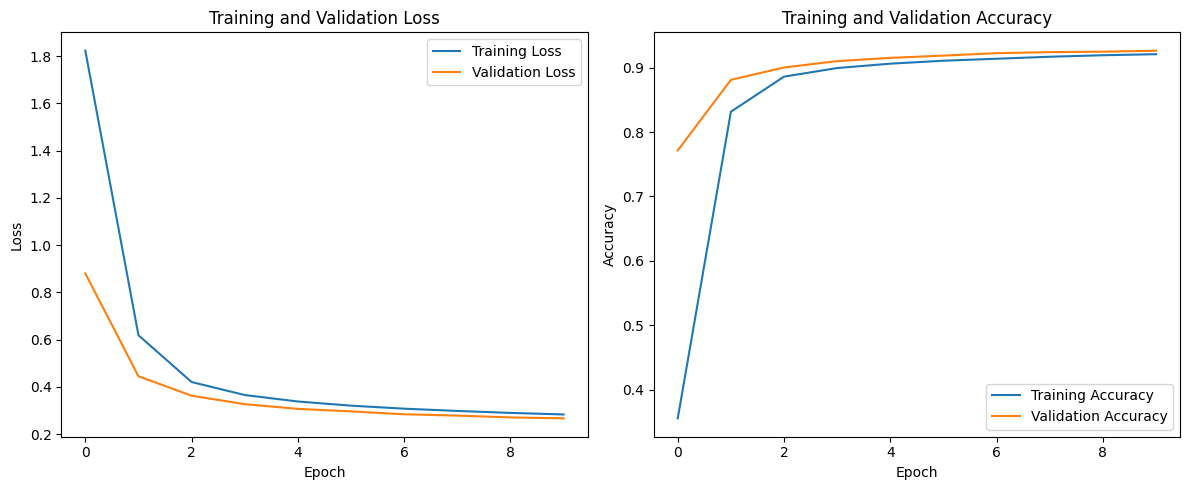

In [ ]:
# Cell 13
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 14
# Change lr to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3022	Train Accuracy 0.1250	
Epoch: [0][10/750]	Batch Time 0.003 	Batch Loss 2.2980	Train Accuracy 0.1562	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3006	Train Accuracy 0.0781	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3057	Train Accuracy 0.1094	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.3179	Train Accuracy 0.1250	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.3184	Train Accuracy 0.0781	
Epoch: [0][60/750]	Batch Time 0.003 	Batch Loss 2.2967	Train Accuracy 0.1562	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3062	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.008 	Batch Loss 2.3027	Train Accuracy 0.1562	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.2834	Train Accuracy 0.1406	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.3082	Train Accuracy 0.1094	
Epoch: [0][110/7

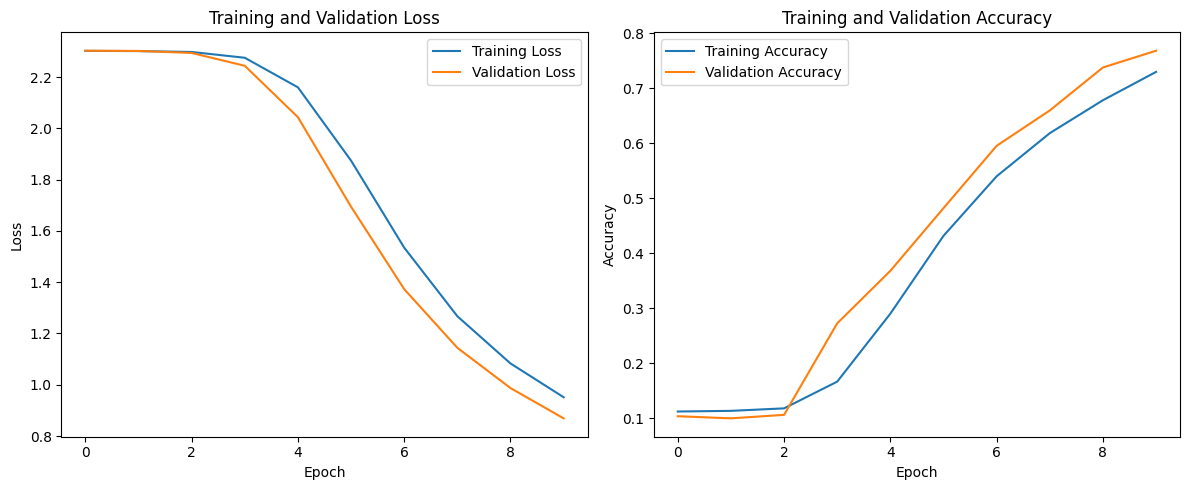

In [ ]:
# Cell 15
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 16
# Change lr to 5e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.010 	Batch Loss 2.3022	Train Accuracy 0.0781	
Epoch: [0][10/750]	Batch Time 0.005 	Batch Loss 2.3092	Train Accuracy 0.0781	
Epoch: [0][20/750]	Batch Time 0.005 	Batch Loss 2.2944	Train Accuracy 0.1406	
Epoch: [0][30/750]	Batch Time 0.005 	Batch Loss 2.2962	Train Accuracy 0.1406	
Epoch: [0][40/750]	Batch Time 0.005 	Batch Loss 2.3049	Train Accuracy 0.1406	
Epoch: [0][50/750]	Batch Time 0.007 	Batch Loss 2.3075	Train Accuracy 0.1094	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3209	Train Accuracy 0.0625	
Epoch: [0][70/750]	Batch Time 0.005 	Batch Loss 2.2939	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.005 	Batch Loss 2.2945	Train Accuracy 0.0781	
Epoch: [0][90/750]	Batch Time 0.006 	Batch Loss 2.3106	Train Accuracy 0.0938	
Epoch: [0][100/750]	Batch Time 0.005 	Batch Loss 2.2897	Train Accuracy 0.1562	
Epoch: [0][110/7

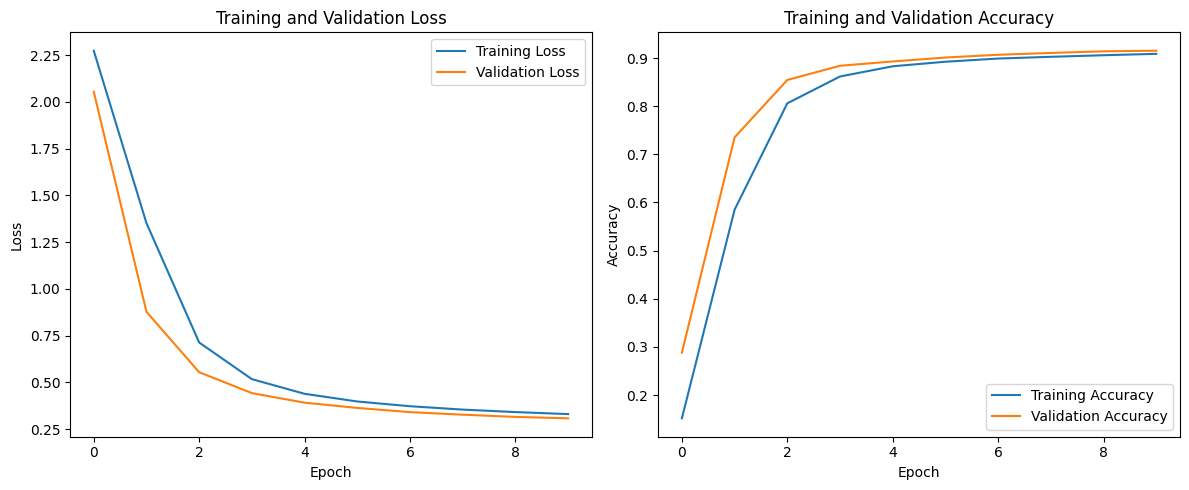

In [ ]:
# Cell 17
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here: Results show that a learning rate of 1.0 worked surprisingly well, which is somewhat unusual since high learning rates often lead to instability. From training curves, the loss decreased quickly and stabilized, while the validation loss remained close to the training loss. This suggests that the model did not overfit and was able to generalize well. Similarly, the accuracy curves indicate a rapid improvement in the first few epochs, eventually stabilizing around 94.8%, which is a strong performance for MNIST.

# Regularization

- Tune the Two Layer Neural Network with various regularization coefficients (while keeping all other hyperparameters constant) by changing the config file.
  
  - reg = 1e-1
  - reg = 1e-2
  - reg = 1e-3
  - reg = 1e-4
  - reg = 1

When you are making changes to the regularization/learning rate values in the `.yaml` files, please do not use scientific notation in the `.yaml` files i.e. instead of writing `1e-1` please write `0.1`. You may create multiple config files for tuning the learning rate and the regularization strength.


In [ ]:
# Cell 18
# Change reg to 1e-1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.004 	Batch Loss 2.3028	Train Accuracy 0.0469	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.3179	Train Accuracy 0.1094	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3215	Train Accuracy 0.0781	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.2944	Train Accuracy 0.1094	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.2951	Train Accuracy 0.0938	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.2942	Train Accuracy 0.1250	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3216	Train Accuracy 0.0781	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3239	Train Accuracy 0.0469	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3438	Train Accuracy 0.1094	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3264	Train Accuracy 0.0781	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.2910	Train Accuracy 0.1094	
Epoch: [0][110/7

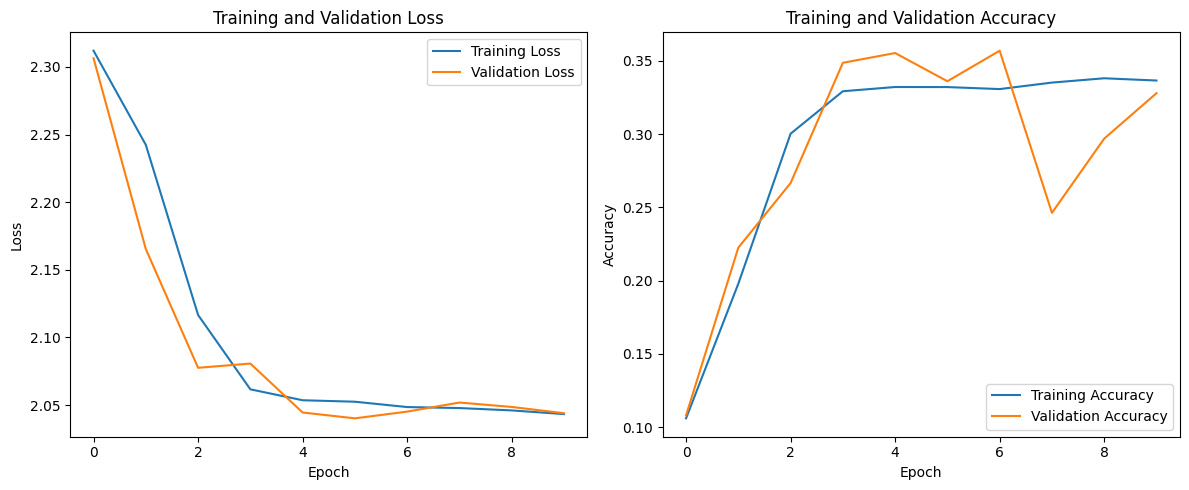

In [ ]:
# Cell 19
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 20
# Change reg to 1e-2 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3023	Train Accuracy 0.1250	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.3190	Train Accuracy 0.1094	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3310	Train Accuracy 0.0938	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3256	Train Accuracy 0.1562	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.2997	Train Accuracy 0.0938	
Epoch: [0][50/750]	Batch Time 0.004 	Batch Loss 2.3182	Train Accuracy 0.0469	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3104	Train Accuracy 0.1094	
Epoch: [0][70/750]	Batch Time 0.006 	Batch Loss 2.3058	Train Accuracy 0.0938	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3344	Train Accuracy 0.0625	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3159	Train Accuracy 0.1406	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.2965	Train Accuracy 0.1406	
Epoch: [0][110/7

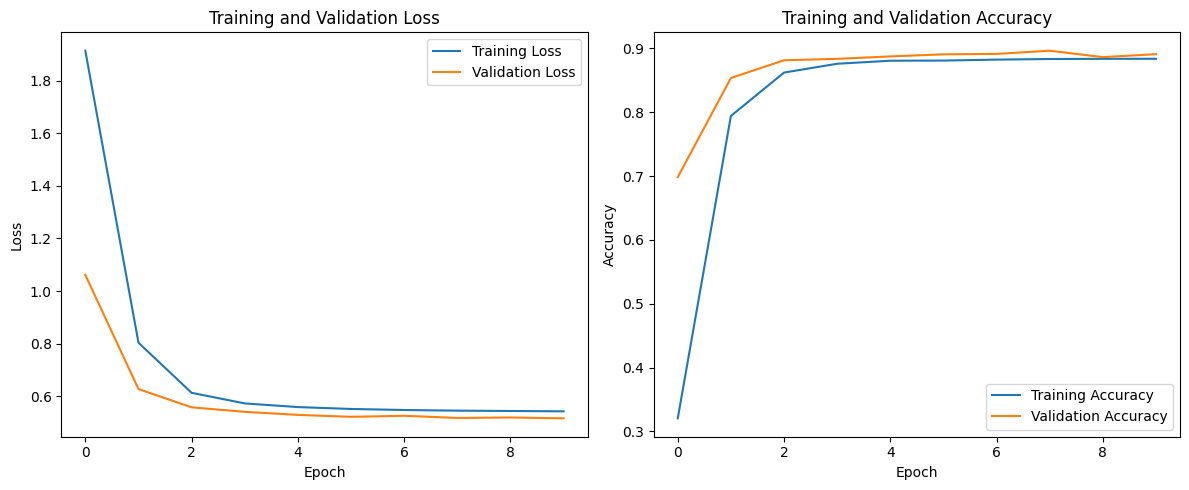

In [ ]:
# Cell 21
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 22
# Change reg to 1e-3 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.003 	Batch Loss 2.3033	Train Accuracy 0.0625	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.3020	Train Accuracy 0.0938	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3138	Train Accuracy 0.0781	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3171	Train Accuracy 0.0938	
Epoch: [0][40/750]	Batch Time 0.003 	Batch Loss 2.2934	Train Accuracy 0.0781	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.2940	Train Accuracy 0.1406	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3072	Train Accuracy 0.1406	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3291	Train Accuracy 0.1406	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3050	Train Accuracy 0.1094	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3508	Train Accuracy 0.0469	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.3126	Train Accuracy 0.1250	
Epoch: [0][110/7

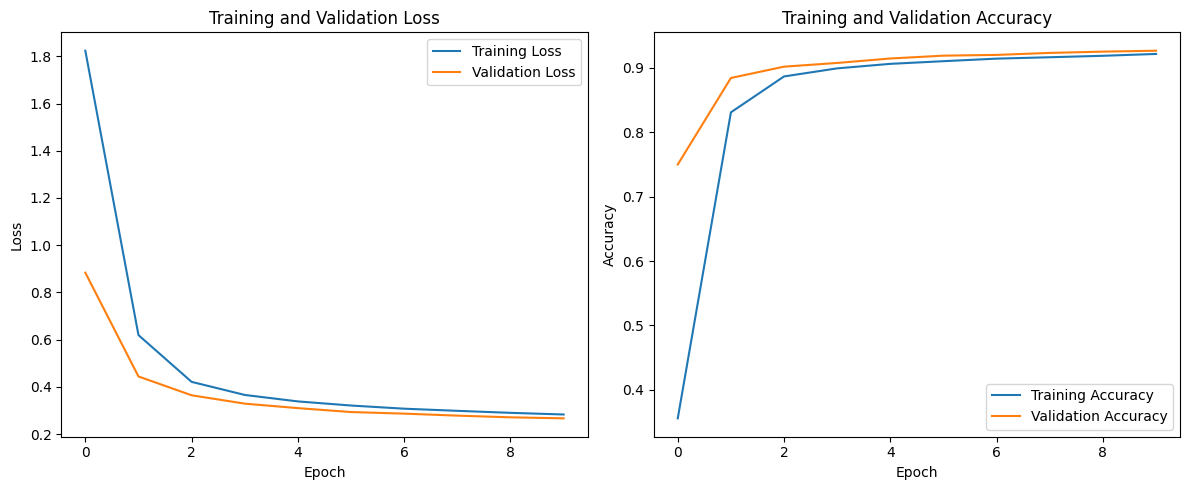

In [ ]:
# Cell 23
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 24
# Change reg to 1e-4 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.004 	Batch Loss 2.3025	Train Accuracy 0.1250	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.3037	Train Accuracy 0.0938	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.2843	Train Accuracy 0.1094	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.3273	Train Accuracy 0.1094	
Epoch: [0][40/750]	Batch Time 0.002 	Batch Loss 2.3447	Train Accuracy 0.0781	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.3403	Train Accuracy 0.1094	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.3418	Train Accuracy 0.1094	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3091	Train Accuracy 0.1562	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.3266	Train Accuracy 0.0781	
Epoch: [0][90/750]	Batch Time 0.002 	Batch Loss 2.3114	Train Accuracy 0.0938	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.3096	Train Accuracy 0.0938	
Epoch: [0][110/7

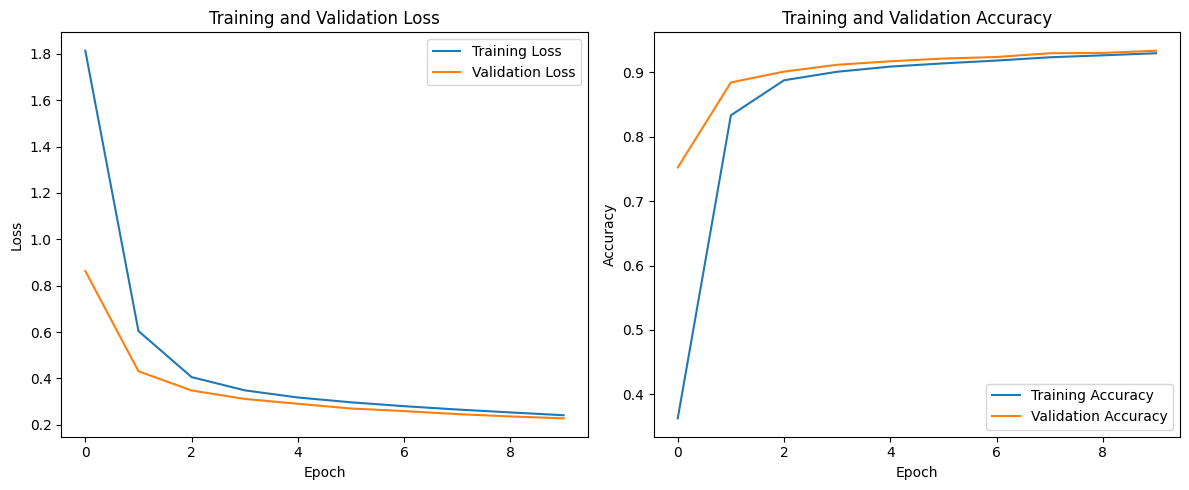

In [ ]:
# Cell 25
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

In [ ]:
# Cell 26
# Change reg to 1 in the config file and run this code block
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.004 	Batch Loss 2.3028	Train Accuracy 0.0625	
Epoch: [0][10/750]	Batch Time 0.002 	Batch Loss 2.2957	Train Accuracy 0.1250	
Epoch: [0][20/750]	Batch Time 0.002 	Batch Loss 2.3241	Train Accuracy 0.1094	
Epoch: [0][30/750]	Batch Time 0.002 	Batch Loss 2.2812	Train Accuracy 0.1562	
Epoch: [0][40/750]	Batch Time 0.003 	Batch Loss 2.2812	Train Accuracy 0.0938	
Epoch: [0][50/750]	Batch Time 0.002 	Batch Loss 2.2895	Train Accuracy 0.0938	
Epoch: [0][60/750]	Batch Time 0.002 	Batch Loss 2.2950	Train Accuracy 0.0938	
Epoch: [0][70/750]	Batch Time 0.002 	Batch Loss 2.3175	Train Accuracy 0.1094	
Epoch: [0][80/750]	Batch Time 0.002 	Batch Loss 2.2905	Train Accuracy 0.1406	
Epoch: [0][90/750]	Batch Time 0.003 	Batch Loss 2.2889	Train Accuracy 0.1562	
Epoch: [0][100/750]	Batch Time 0.002 	Batch Loss 2.3142	Train Accuracy 0.1094	
Epoch: [0][110/7

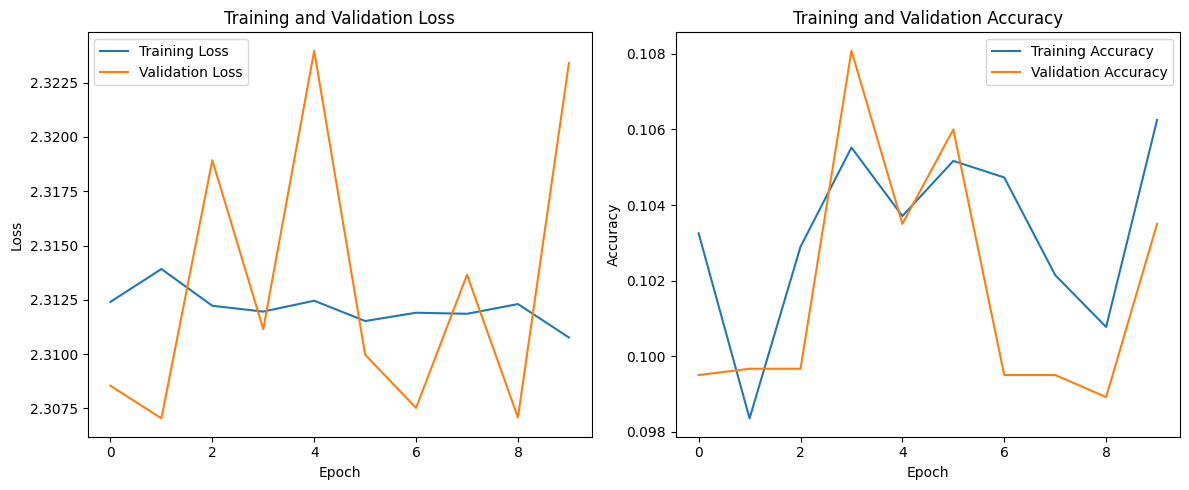

In [ ]:
# Cell 27
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)

Describe and explain your findings here: Results indicate that with a regularization parameter of 0.0001 and a learning rate of 0.1, the model has achieved strong performance, with a final test accuracy of 93.38%. The loss and accuracy curves provide valuable insights into the training dynamics.

From the training and validation loss curves, the loss decreases sharply within the first few epochs and stabilizes at a low value. Both the training and validation loss curves remain closely aligned, suggesting that the model is learning effectively without significant overfitting. The fact that the validation loss does not increase at later epochs indicates that the regularization is helping control model complexity.

The accuracy curves show rapid improvement, with both training and validation accuracy converging near 93%. The validation accuracy is slightly higher than training accuracy in the early epochs, which is often an indicator of batch normalization or regularization effects improving generalization. As the epochs progress, the two curves converge closely, confirming that the model generalizes well to unseen data.

The use of a small regularization parameter (0.0001) likely helped prevent overfitting while still allowing the model to learn effectively.

## Hyper-parameter Tuning

You are now free to tune any hyperparameters for better accuracy. In this block type the configuration of your best model and provide a brief explanation of why it works.

In the previous section, you should have achieved around 70% and 90% validation accuracy (+/- 10%) with the softmax and two-layer networks, respectively. For your tuning, we expect at least 65% validation accuracy, but try to beat your best numbers from the previous section.

Final Choice: Learning rate = 0.9 and regularization = 0.0001 appears to have the best results, achieving a test accuracy of 97.09%. The training curves confirm that this combination strikes a balance between fast convergence and generalization.

From loss curve, both training and validation loss decrease sharply in the first several epochs and gradually stabilize at a low value. The fact that the training and validation loss remain closely aligned indicates that overfitting is well-controlled, suggesting that the regularization is playing its intended role.

The accuracy curves show a rapid improvement in the first few epochs, with both training and validation accuracy reaching high values above 97%. The two curves are very close by the end of training, which means that the model generalizes well to unseen data. Unlike previous runs where validation accuracy briefly exceeded training accuracy in the early epochs, here they converge smoothly, showing that the model is learning effectively without instability.

The slightly lower learning rate of 0.9 (compared to 1.0) likely helped fine-tune the training process, allowing stable updates while still converging quickly. Meanwhile, regularization at 0.0001 prevented excessive overfitting, ensuring that the model remains generalizable.

In [ ]:
# Cell 28
# hyperparameter tuning
train_loss_history, train_acc_history, valid_loss_history, valid_acc_history = train_model("configs/config_exp.yaml")

Loading training data...
Training data loaded with 60000 images
Loading testing data...
Testing data loaded with 10000 images
Epoch: [0][0/750]	Batch Time 0.011 	Batch Loss 2.3017	Train Accuracy 0.1250	
Epoch: [0][10/750]	Batch Time 0.005 	Batch Loss 2.2702	Train Accuracy 0.0938	
Epoch: [0][20/750]	Batch Time 0.005 	Batch Loss 2.1888	Train Accuracy 0.1875	
Epoch: [0][30/750]	Batch Time 0.010 	Batch Loss 2.3014	Train Accuracy 0.1406	
Epoch: [0][40/750]	Batch Time 0.004 	Batch Loss 2.1789	Train Accuracy 0.2812	
Epoch: [0][50/750]	Batch Time 0.010 	Batch Loss 2.2444	Train Accuracy 0.1250	
Epoch: [0][60/750]	Batch Time 0.006 	Batch Loss 2.0731	Train Accuracy 0.3125	
Epoch: [0][70/750]	Batch Time 0.005 	Batch Loss 1.9541	Train Accuracy 0.2500	
Epoch: [0][80/750]	Batch Time 0.003 	Batch Loss 1.7949	Train Accuracy 0.3750	
Epoch: [0][90/750]	Batch Time 0.004 	Batch Loss 1.6150	Train Accuracy 0.4688	
Epoch: [0][100/750]	Batch Time 0.005 	Batch Loss 1.5289	Train Accuracy 0.5000	
Epoch: [0][110/7

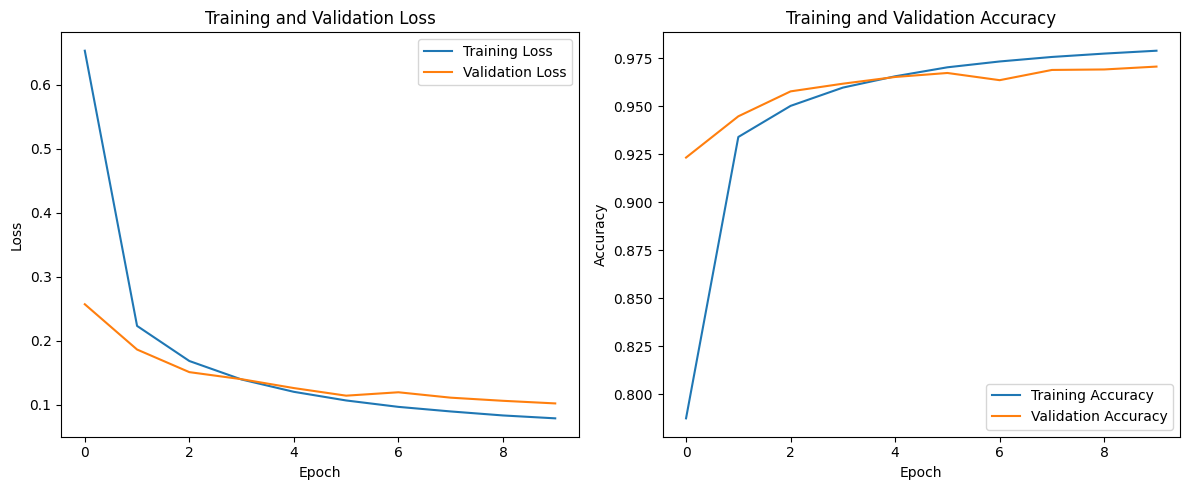

In [ ]:
# Cell 29
plot_curves(train_loss_history, train_acc_history, valid_loss_history, valid_acc_history)